<a href="https://colab.research.google.com/github/Nitish9973/Delhivery-Data-Analysis/blob/main/Business_Case_Delhivery_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
import re

In [4]:
url="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181"
df=pd.read_csv(url)
df.head(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [6]:
df.shape

(144867, 24)

In [7]:
df.dtypes

,0
data,object
trip_creation_time,object
route_schedule_uuid,object
route_type,object
trip_uuid,object
source_center,object
source_name,object
destination_center,object
destination_name,object
od_start_time,object


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

# **Datetime Formatting for datetime columns**

In [9]:
df['trip_creation_time']=pd.to_datetime(df['trip_creation_time'])
df['od_start_time']=pd.to_datetime(df['od_start_time'])
df['od_end_time']=pd.to_datetime(df['od_end_time'])
df['cutoff_timestamp']=pd.to_datetime(df['cutoff_timestamp'], format='mixed')

In [10]:
df.dtypes

,0
data,object
trip_creation_time,datetime64[ns]
route_schedule_uuid,object
route_type,object
trip_uuid,object
source_center,object
source_name,object
destination_center,object
destination_name,object
od_start_time,datetime64[ns]


# **Missing Value Analysis**

In [11]:
df.isna().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,293
destination_center,0
destination_name,261
od_start_time,0


#Observations:-


*   
Source name and Destination name have missing values
*   as we have very records having missing value, we can drop those rows from analysis





In [12]:
# drop missing values
df.drop(df[df['source_name'].isna() | df['destination_name'].isna()].index , inplace=True)

In [13]:
df.isna().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,0
destination_center,0
destination_name,0
od_start_time,0


# **2. Trip Segment Analysis**

* delivery details of one package is divided into several rows (think of it as connecting flights to reach a particular destination) we should find way to identify unique trip details for source_destination to understand delivery data.






1.   we can create unique identifier for different segment of a trip based on combination of trip_uuid, source_center and destination_center, we will call it as segment key
2.  Based on segment_key we will create new aggregated columns segment_actual_time,segment_osrm_distance,segment_osrm_time





In [14]:
df['segment_key']=df.apply(lambda x:"#".join([x['trip_uuid'],x['source_center'],x['destination_center']]), axis=1)

In [15]:
df['segment_actual_time_cumsum']=df.groupby('segment_key')['segment_actual_time'].transform(lambda x:x.cumsum())

df['segment_osrm_time_cumsum']=df.groupby('segment_key')['segment_osrm_time'].transform(lambda x:x.cumsum())

df['segment_osrm_distance_cumsum']=df.groupby('segment_key')['segment_osrm_distance'].transform(lambda x:x.cumsum())

In [16]:
df['segment_actual_time_sum']=df.groupby('segment_key')['segment_actual_time_cumsum'].transform(lambda x:x.iloc[-1])
df['segment_osrm_time_sum']=df.groupby('segment_key')['segment_osrm_time_cumsum'].transform(lambda x:x.iloc[-1])
df['segment_osrm_distance_sum']=df.groupby('segment_key')['segment_osrm_distance_cumsum'].transform(lambda x:x.iloc[-1])

In [17]:
df=df.sort_values(by=['segment_key','od_end_time'])
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,segment_osrm_time,segment_osrm_distance,segment_factor,segment_key,segment_actual_time_cumsum,segment_osrm_time_cumsum,segment_osrm_distance_cumsum,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
125002,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,33.0,38.0620,1.515152,trip-153671041653548748#IND209304AAA#IND000000ACB,50.0,33.0,38.0620,728.0,534.0,670.6205
125003,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,8.0,10.9921,1.125000,trip-153671041653548748#IND209304AAA#IND000000ACB,59.0,41.0,49.0541,728.0,534.0,670.6205
125004,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,22.0,30.6308,1.545455,trip-153671041653548748#IND209304AAA#IND000000ACB,93.0,63.0,79.6849,728.0,534.0,670.6205
125005,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,17.0,25.0959,1.470588,trip-153671041653548748#IND209304AAA#IND000000ACB,118.0,80.0,104.7808,728.0,534.0,670.6205
125006,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,14.0,21.0389,1.428571,trip-153671041653548748#IND209304AAA#IND000000ACB,138.0,94.0,125.8197,728.0,534.0,670.6205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86464,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,...,6.0,6.4998,1.333333,trip-153861115439069069#IND628801AAA#IND628204AAA,29.0,14.0,16.0184,29.0,14.0,16.0184
11572,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,...,17.0,23.9866,2.647059,trip-153861118270144424#IND583119AAA#IND583101AAA,45.0,17.0,23.9866,233.0,42.0,52.5303
11573,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,...,25.0,28.5437,7.520000,trip-153861118270144424#IND583119AAA#IND583101AAA,233.0,42.0,52.5303,233.0,42.0,52.5303
11570,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583201AAA,Hospet (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),2018-10-04 02:51:44.712656,...,21.0,23.2367,1.428571,trip-153861118270144424#IND583201AAA#IND583119AAA,30.0,21.0,23.2367,41.0,25.0,28.0484


# **3 . Feature Engineering**

In [18]:
df['od_time_diff_hour']=(df['od_end_time']-df['od_start_time'])/pd.Timedelta(hours=1)

**Extract City, Place, Code and State Information**

In [19]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor',
       'segment_key', 'segment_actual_time_cumsum', 'segment_osrm_time_cumsum',
       'segment_osrm_distance_cumsum', 'segment_actual_time_sum',
       'segment_osrm_time_sum', 'segment_osrm_distance_sum',
       'od_time_diff_hour'],
      dtype='object')

In [20]:

df['trip_creation_year']=df['trip_creation_time'].dt.year
df['trip_creation_month']=df['trip_creation_time'].dt.month
df['trip_creation_day']=df['trip_creation_time'].dt.day

In [21]:
def get_state(name):
    pattern="\([A-Za-z]+\s?\w+\)"
    pattern="\([A-Za-z &]+\s?\w+\)"
    state=re.findall(pattern, name)[0]
    state=state.replace("(","")
    state=state.replace(")","")
    return state

In [22]:
def get_city(name):
    pattern="\([A-Za-z &]+\s?\w+\)"
    state=re.findall(pattern, name)[0]
    city_place_code=name.replace(state,'')
    city_place_code_parts=city_place_code.split("_")
    if len(city_place_code_parts)==1 :
        city=city_place_code_parts[0].strip()
    elif len(city_place_code_parts)==2:
        city=city_place_code.strip()
    elif len(city_place_code_parts)==3 or len(city_place_code_parts)==4:
        city=city_place_code_parts[0].strip()
    else:
        city=city_place_code
    return city


In [23]:
def get_place(name):
    pattern="\([A-Za-z &]+\s?\w+\)"
    try:
        state=re.findall(pattern, name)[0]
        city_place_code=name.replace(state,'')
        city_place_code_parts=city_place_code.split("_")
        if len(city_place_code_parts)==3 or len(city_place_code_parts)==4:
            place=city_place_code_parts[1].strip()
        else:
            place=None
        return place
    except Exception as exp:
        return None

In [24]:
def get_code(name):
    pattern="\([A-Za-z &]+\s?\w+\)"
    try:
        state=re.findall(pattern, name)[0]
        city_place_code=name.replace(state,'')
        city_place_code_parts=city_place_code.split("_")
        if len(city_place_code_parts)==3 :
            code=city_place_code_parts[2].strip()
        elif  len(city_place_code_parts)==4:
            code="_".join(city_place_code_parts[2:]).strip()
        else:
            code=None
        return code
    except Exception as exp:
        return None

In [25]:
df['destination_state']=df['destination_name'].map(get_state)
df['source_state']=df['source_name'].map(get_state)

In [26]:
df['destination_city']=df['destination_name'].map(get_city)
df['source_city']=df['source_name'].map(get_state)

In [27]:
df['destination_place']=df['destination_name'].map(get_place)
df['source_place']=df['source_name'].map(get_place)

In [28]:
df['destination_code']=df['destination_name'].map(get_code)
df['source_code']=df['source_name'].map(get_code)

# 4. In-depth analysis:
4.1. Grouping and Aggregating at Trip-level




1.   a. Groups the segment data by the trip_uuid column to focus on aggregating data at the trip level.

2. Apply suitable aggregation functions like first, last, and sum specified in the create_trip_dict dictionary to calculate summary statistics for each trip.





*   actual_time aggregated value and OSRM time aggregated value.

*   actual_time aggregated value and segment actual time aggregated value.
*  OSRM distance aggregated value and segment OSRM distance aggregated value.
*  OSRM time aggregated value and segment OSRM time aggregated value.




In [29]:
trip_actual_time_sum_df=df.groupby(['trip_uuid','segment_key']).nth(-1).groupby(['trip_uuid']).agg(trip_actual_time_sum=('actual_time','sum')).reset_index()
trip_actual_time_sum_df

,trip_uuid,trip_actual_time_sum
0,trip-153671041653548748,1562.0
1,trip-153671042288605164,143.0
2,trip-153671043369099517,3347.0
3,trip-153671046011330457,59.0
4,trip-153671052974046625,341.0
...,...,...
14782,trip-153861095625827784,83.0
14783,trip-153861104386292051,21.0
14784,trip-153861106442901555,282.0
14785,trip-153861115439069069,264.0


In [36]:
trip_segment_actual_time_sum_df=df.groupby(['trip_uuid','segment_key']).nth(-1).groupby(['trip_uuid']).agg(trip_segment_actual_time_sum=('segment_actual_time_sum','sum')).reset_index()
trip_segment_actual_time_sum_df

,trip_uuid,trip_segment_actual_time_sum
0,trip-153671041653548748,1548.0
1,trip-153671042288605164,141.0
2,trip-153671043369099517,3308.0
3,trip-153671046011330457,59.0
4,trip-153671052974046625,340.0
...,...,...
14782,trip-153861095625827784,82.0
14783,trip-153861104386292051,21.0
14784,trip-153861106442901555,281.0
14785,trip-153861115439069069,258.0


In [30]:
trip_segment_osrm_time_sum_df=df.groupby(['trip_uuid','segment_key']).nth(-1).groupby(['trip_uuid']).agg(trip_segment_osrm_time_sum=('segment_osrm_time_sum','sum')).reset_index()
trip_segment_osrm_time_sum_df

,trip_uuid,trip_segment_osrm_time_sum
0,trip-153671041653548748,1008.0
1,trip-153671042288605164,65.0
2,trip-153671043369099517,1941.0
3,trip-153671046011330457,16.0
4,trip-153671052974046625,115.0
...,...,...
14782,trip-153861095625827784,62.0
14783,trip-153861104386292051,11.0
14784,trip-153861106442901555,88.0
14785,trip-153861115439069069,221.0


In [31]:
trip_segment_osrm_distance_sum_df=df.groupby(['trip_uuid','segment_key']).nth(-1).groupby(['trip_uuid']).agg(trip_segment_osrm_distance_sum=('segment_osrm_distance_sum','sum')).reset_index()
trip_segment_osrm_distance_sum_df

,trip_uuid,trip_segment_osrm_distance_sum
0,trip-153671041653548748,1320.4733
1,trip-153671042288605164,84.1894
2,trip-153671043369099517,2545.2678
3,trip-153671046011330457,19.8766
4,trip-153671052974046625,146.7919
...,...,...
14782,trip-153861095625827784,64.8551
14783,trip-153861104386292051,16.0883
14784,trip-153861106442901555,104.8866
14785,trip-153861115439069069,223.5324


In [32]:
trip_osrm_time_sum_df=df.groupby(['trip_uuid','segment_key']).nth(-1).groupby(['trip_uuid']).agg(trip_osrm_time_sum=('osrm_time','sum')).reset_index()
trip_osrm_time_sum_df

,trip_uuid,trip_osrm_time_sum
0,trip-153671041653548748,717.0
1,trip-153671042288605164,68.0
2,trip-153671043369099517,1740.0
3,trip-153671046011330457,15.0
4,trip-153671052974046625,117.0
...,...,...
14782,trip-153861095625827784,62.0
14783,trip-153861104386292051,12.0
14784,trip-153861106442901555,48.0
14785,trip-153861115439069069,179.0


In [33]:
trip_osrm_distance_sum_df=df.groupby(['trip_uuid','segment_key']).nth(-1).groupby(['trip_uuid']).agg(trip_osrm_distance_sum=('osrm_distance','sum')).reset_index()
trip_osrm_distance_sum_df

,trip_uuid,trip_osrm_distance_sum
0,trip-153671041653548748,991.3523
1,trip-153671042288605164,85.1110
2,trip-153671043369099517,2354.0665
3,trip-153671046011330457,19.6800
4,trip-153671052974046625,146.7918
...,...,...
14782,trip-153861095625827784,73.4630
14783,trip-153861104386292051,16.0882
14784,trip-153861106442901555,58.9037
14785,trip-153861115439069069,171.1103


In [34]:
trip_total_time_in_hrs_df=df.groupby(['trip_uuid','segment_key']).nth(-1).groupby(['trip_uuid']).agg(trip_total_time_in_hrs=('od_time_diff_hour','sum')).reset_index()
trip_total_time_in_hrs_df

,trip_uuid,trip_total_time_in_hrs
0,trip-153671041653548748,37.668497
1,trip-153671042288605164,3.026865
2,trip-153671043369099517,65.572709
3,trip-153671046011330457,1.674916
4,trip-153671052974046625,11.972484
...,...,...
14782,trip-153861095625827784,4.300482
14783,trip-153861104386292051,1.009842
14784,trip-153861106442901555,7.035331
14785,trip-153861115439069069,5.808548


# **Combine all trip aggregated dataframes to single trip aggregations dataframe**

In [37]:
trip_aggregated_df=pd.concat(
    objs=(
            iDF.set_index('trip_uuid') for iDF in (trip_actual_time_sum_df,trip_osrm_time_sum_df, trip_osrm_distance_sum_df,
                                                 trip_segment_actual_time_sum_df,trip_segment_osrm_time_sum_df,trip_segment_osrm_distance_sum_df,
                                                 trip_total_time_in_hrs_df)
         ),
    axis=1,
    join='inner'
).reset_index()
trip_aggregated_df

,trip_uuid,trip_actual_time_sum,trip_osrm_time_sum,trip_osrm_distance_sum,trip_segment_actual_time_sum,trip_segment_osrm_time_sum,trip_segment_osrm_distance_sum,trip_total_time_in_hrs
0,trip-153671041653548748,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,37.668497
1,trip-153671042288605164,143.0,68.0,85.1110,141.0,65.0,84.1894,3.026865
2,trip-153671043369099517,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678,65.572709
3,trip-153671046011330457,59.0,15.0,19.6800,59.0,16.0,19.8766,1.674916
4,trip-153671052974046625,341.0,117.0,146.7918,340.0,115.0,146.7919,11.972484
...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,83.0,62.0,73.4630,82.0,62.0,64.8551,4.300482
14783,trip-153861104386292051,21.0,12.0,16.0882,21.0,11.0,16.0883,1.009842
14784,trip-153861106442901555,282.0,48.0,58.9037,281.0,88.0,104.8866,7.035331
14785,trip-153861115439069069,264.0,179.0,171.1103,258.0,221.0,223.5324,5.808548


In [38]:
df=pd.merge(df,trip_aggregated_df, on='trip_uuid' )
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,source_place,destination_code,source_code,trip_actual_time_sum,trip_osrm_time_sum,trip_osrm_distance_sum,trip_segment_actual_time_sum,trip_segment_osrm_time_sum,trip_segment_osrm_distance_sum,trip_total_time_in_hrs
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,Central,HB,H_6,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,37.668497
1,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,Central,HB,H_6,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,37.668497
2,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,Central,HB,H_6,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,37.668497
3,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,Central,HB,H_6,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,37.668497
4,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,Central,HB,H_6,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,37.668497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144311,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,...,Busstand,D,D,264.0,179.0,171.1103,258.0,221.0,223.5324,5.808548
144312,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,...,WrdN1DPP,None,D,275.0,68.0,80.5787,274.0,67.0,80.5787,5.906793
144313,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,...,WrdN1DPP,None,D,275.0,68.0,80.5787,274.0,67.0,80.5787,5.906793
144314,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583201AAA,Hospet (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),2018-10-04 02:51:44.712656,...,None,D,None,275.0,68.0,80.5787,274.0,67.0,80.5787,5.906793


# **4.2. Outlier Detection & Treatment**

a. Find any existing outliers in numerical features.

b. Visualize the outlier values using Boxplot.

c. Handle the outliers using the IQR method.


In [39]:
trip_aggregated_df

,trip_uuid,trip_actual_time_sum,trip_osrm_time_sum,trip_osrm_distance_sum,trip_segment_actual_time_sum,trip_segment_osrm_time_sum,trip_segment_osrm_distance_sum,trip_total_time_in_hrs
0,trip-153671041653548748,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,37.668497
1,trip-153671042288605164,143.0,68.0,85.1110,141.0,65.0,84.1894,3.026865
2,trip-153671043369099517,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678,65.572709
3,trip-153671046011330457,59.0,15.0,19.6800,59.0,16.0,19.8766,1.674916
4,trip-153671052974046625,341.0,117.0,146.7918,340.0,115.0,146.7919,11.972484
...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,83.0,62.0,73.4630,82.0,62.0,64.8551,4.300482
14783,trip-153861104386292051,21.0,12.0,16.0882,21.0,11.0,16.0883,1.009842
14784,trip-153861106442901555,282.0,48.0,58.9037,281.0,88.0,104.8866,7.035331
14785,trip-153861115439069069,264.0,179.0,171.1103,258.0,221.0,223.5324,5.808548


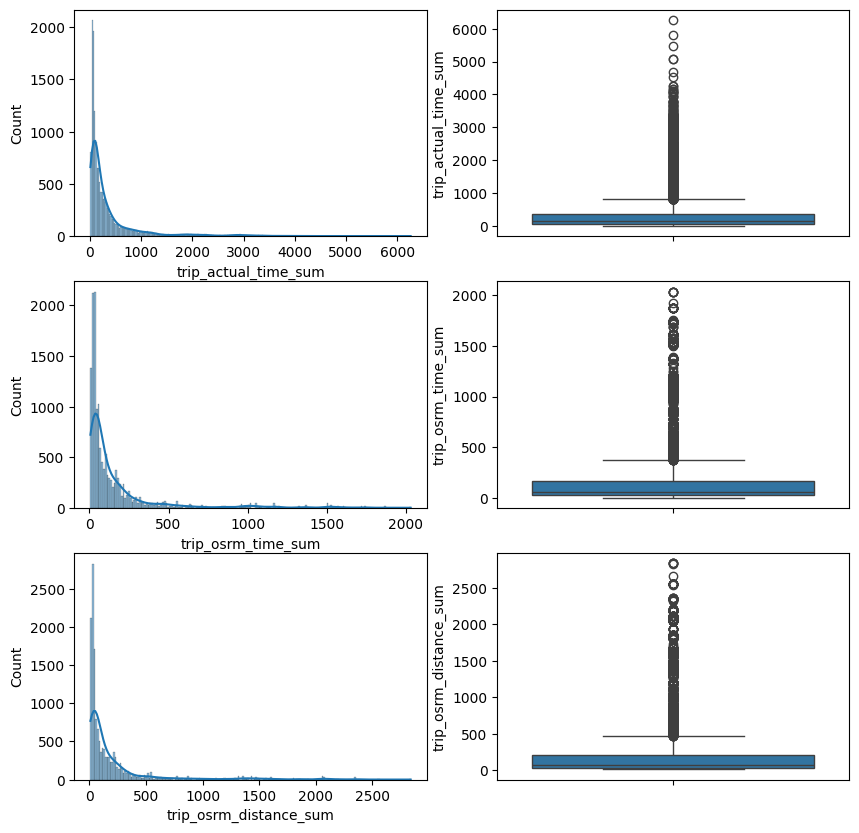

In [40]:
import warnings
warnings.filterwarnings("ignore")
fig, axs = plt.subplots(3, 2,  figsize=(10,10))
sns.histplot(ax=axs[0,0],data= trip_aggregated_df['trip_actual_time_sum'],kde=True)
sns.boxplot(ax=axs[0,1],data=trip_aggregated_df['trip_actual_time_sum'])

sns.histplot(ax=axs[1,0],data= trip_aggregated_df['trip_osrm_time_sum'],kde=True)
sns.boxplot(ax=axs[1,1],data= trip_aggregated_df['trip_osrm_time_sum'])

sns.histplot(ax=axs[2,0],data= trip_aggregated_df['trip_osrm_distance_sum'],kde=True)
sns.boxplot(ax=axs[2,1],data= trip_aggregated_df['trip_osrm_distance_sum'])


plt.show()

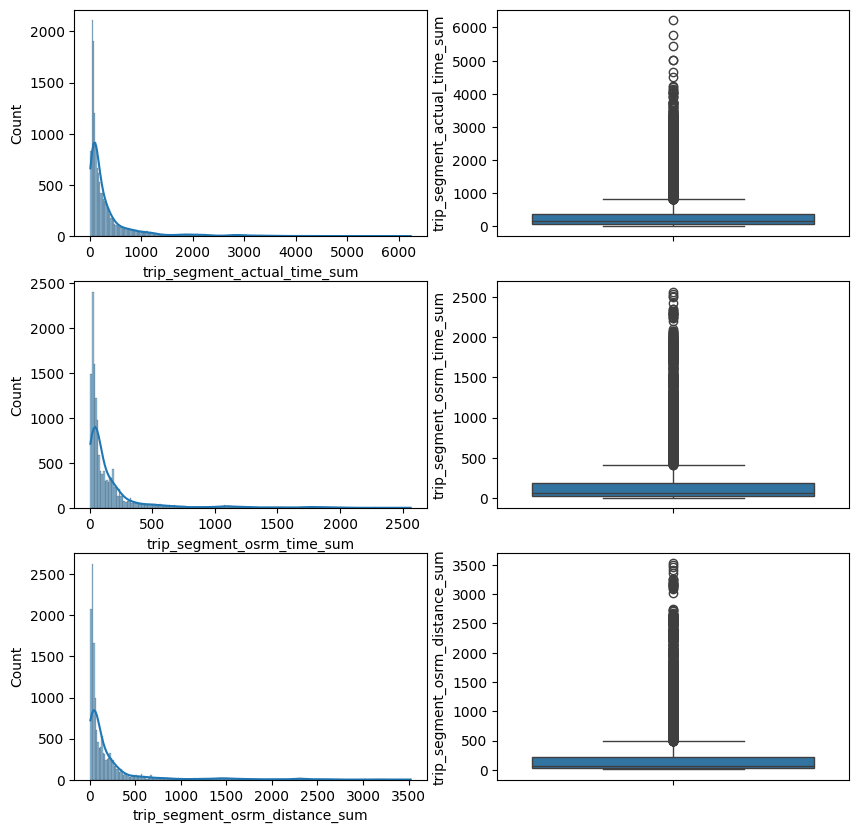

In [41]:
import warnings
warnings.filterwarnings("ignore")
fig, axs = plt.subplots(3, 2,  figsize=(10,10))

sns.histplot(ax=axs[0,0],data= trip_aggregated_df['trip_segment_actual_time_sum'],kde=True)
sns.boxplot(ax=axs[0,1],data= trip_aggregated_df['trip_segment_actual_time_sum'])


sns.histplot(ax=axs[1,0],data= trip_aggregated_df['trip_segment_osrm_time_sum'],kde=True)
sns.boxplot(ax=axs[1,1],data= trip_aggregated_df['trip_segment_osrm_time_sum'])

sns.histplot(ax=axs[2,0],data= trip_aggregated_df['trip_segment_osrm_distance_sum'],kde=True)
sns.boxplot(ax=axs[2,1],data= trip_aggregated_df['trip_segment_osrm_distance_sum'])


plt.show()

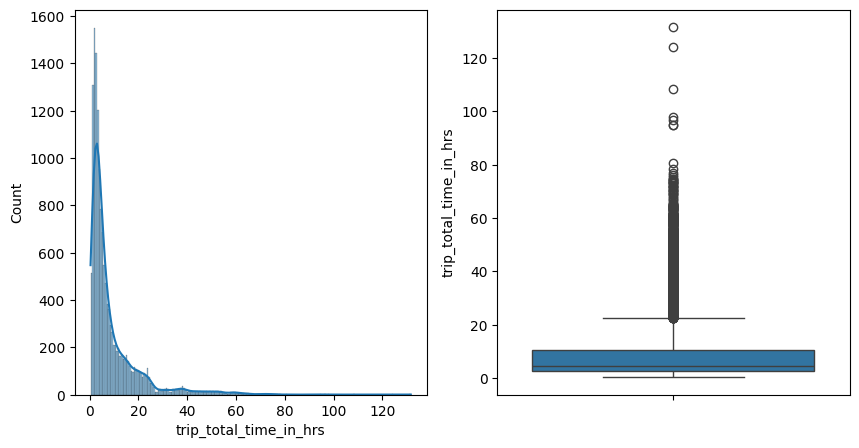

In [42]:
import warnings
warnings.filterwarnings("ignore")
fig, axs = plt.subplots(ncols= 2,  figsize=(10,5))
sns.histplot(ax=axs[0],data= trip_aggregated_df['trip_total_time_in_hrs'],kde=True)
sns.boxplot(ax=axs[1],data= trip_aggregated_df['trip_total_time_in_hrs'])
plt.show()

<Axes: xlabel='trip_actual_time_sum', ylabel='Count'>

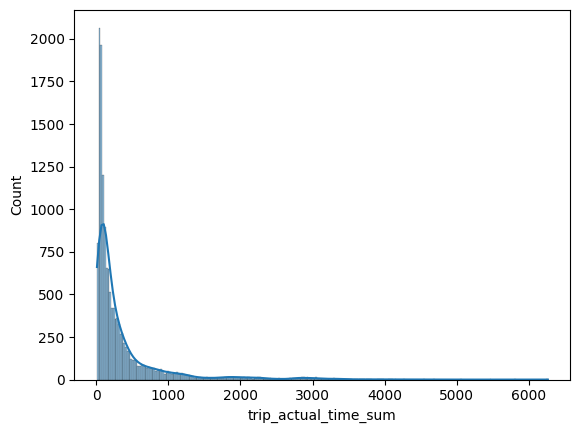

In [43]:
sns.histplot(data=trip_aggregated_df['trip_actual_time_sum'],kde=True)

<Axes: ylabel='trip_actual_time_sum'>

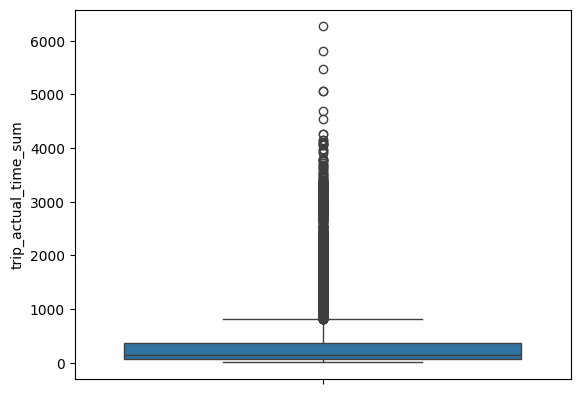

In [44]:
sns.boxplot(data=trip_aggregated_df['trip_actual_time_sum'])

# **Observations**

we have lots of outliers let's remove those outliers Based on IQR range, we will maxout values based on IQR range

In [45]:
def clip_value_helper(row,cl, Q1,Q3, minval, maxval):
    #     Q1=row[cl].quantile(0.25)
    #     Q3=row[cl].quantile(0.75)
    #     minval=min(row[cl])
    #     maxval=max(row[cl])
    IQR=Q3-Q1
    if row[cl]<Q1-1.5*IQR:
        return min(minval, Q1-1.5*IQR)
    elif row[cl] > Q3+1.5*IQR:
        return min(maxval, Q3+1.5*IQR)
    else:
        return row[cl]


In [46]:
trip_aggregated_df.columns

Index(['trip_uuid', 'trip_actual_time_sum', 'trip_osrm_time_sum',
       'trip_osrm_distance_sum', 'trip_segment_actual_time_sum',
       'trip_segment_osrm_time_sum', 'trip_segment_osrm_distance_sum',
       'trip_total_time_in_hrs'],
      dtype='object')

In [47]:
for cl in ['trip_actual_time_sum', 'trip_osrm_time_sum', 'trip_osrm_distance_sum', 'trip_segment_actual_time_sum','trip_segment_osrm_time_sum', 'trip_segment_osrm_distance_sum','trip_total_time_in_hrs']:
    Q1=trip_aggregated_df[cl].quantile(0.25)
    Q3=trip_aggregated_df[cl].quantile(0.75)
    minval=min(trip_aggregated_df[cl])
    maxval=max(trip_aggregated_df[cl])
    trip_aggregated_df[cl]=trip_aggregated_df.apply(lambda row:clip_value_helper(row,cl,
                                                                     Q1,Q3,minval, maxval) , axis=1)

In [48]:
trip_aggregated_df

,trip_uuid,trip_actual_time_sum,trip_osrm_time_sum,trip_osrm_distance_sum,trip_segment_actual_time_sum,trip_segment_osrm_time_sum,trip_segment_osrm_distance_sum,trip_total_time_in_hrs
0,trip-153671041653548748,817.0,376.5,470.47515,811.0,415.0,492.533225,22.654942
1,trip-153671042288605164,143.0,68.0,85.11100,141.0,65.0,84.189400,3.026865
2,trip-153671043369099517,817.0,376.5,470.47515,811.0,415.0,492.533225,22.654942
3,trip-153671046011330457,59.0,15.0,19.68000,59.0,16.0,19.876600,1.674916
4,trip-153671052974046625,341.0,117.0,146.79180,340.0,115.0,146.791900,11.972484
...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,83.0,62.0,73.46300,82.0,62.0,64.855100,4.300482
14783,trip-153861104386292051,21.0,12.0,16.08820,21.0,11.0,16.088300,1.009842
14784,trip-153861106442901555,282.0,48.0,58.90370,281.0,88.0,104.886600,7.035331
14785,trip-153861115439069069,264.0,179.0,171.11030,258.0,221.0,223.532400,5.808548


# **After Clipping Outliers Based On IQR Distribution**

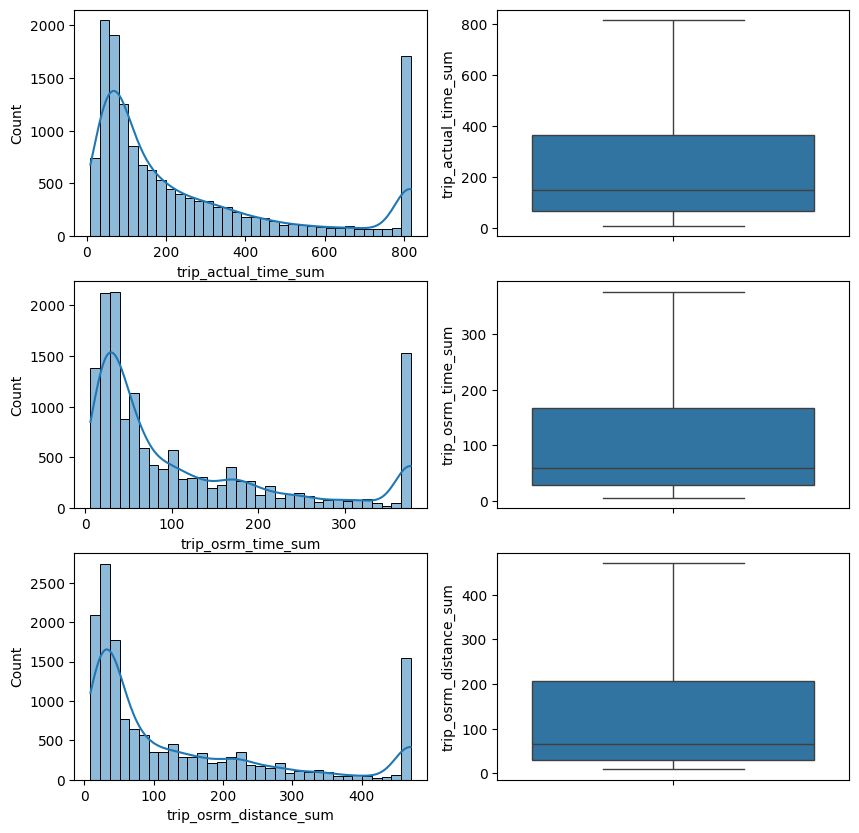

In [49]:
import warnings
warnings.filterwarnings("ignore")
fig, axs = plt.subplots(3, 2,  figsize=(10,10))
sns.histplot(ax=axs[0,0],data= trip_aggregated_df['trip_actual_time_sum'],kde=True)
sns.boxplot(ax=axs[0,1],data=trip_aggregated_df['trip_actual_time_sum'])

sns.histplot(ax=axs[1,0],data= trip_aggregated_df['trip_osrm_time_sum'],kde=True)
sns.boxplot(ax=axs[1,1],data= trip_aggregated_df['trip_osrm_time_sum'])

sns.histplot(ax=axs[2,0],data= trip_aggregated_df['trip_osrm_distance_sum'],kde=True)
sns.boxplot(ax=axs[2,1],data= trip_aggregated_df['trip_osrm_distance_sum'])


plt.show()

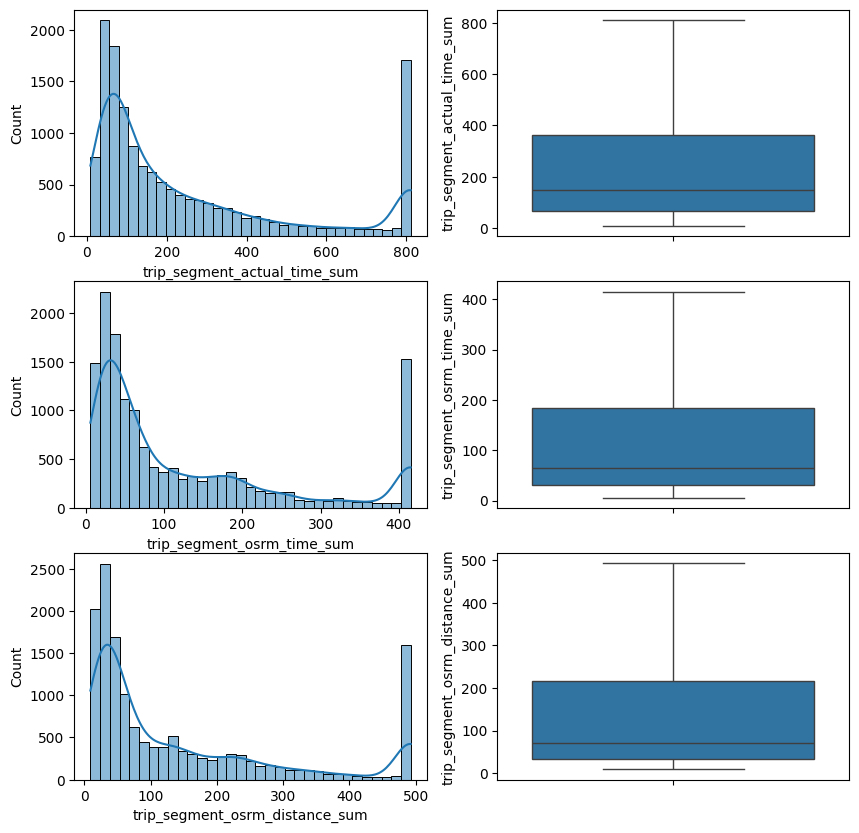

In [50]:
import warnings
warnings.filterwarnings("ignore")
fig, axs = plt.subplots(3, 2,  figsize=(10,10))

sns.histplot(ax=axs[0,0],data= trip_aggregated_df['trip_segment_actual_time_sum'],kde=True)
sns.boxplot(ax=axs[0,1],data= trip_aggregated_df['trip_segment_actual_time_sum'])


sns.histplot(ax=axs[1,0],data= trip_aggregated_df['trip_segment_osrm_time_sum'],kde=True)
sns.boxplot(ax=axs[1,1],data= trip_aggregated_df['trip_segment_osrm_time_sum'])

sns.histplot(ax=axs[2,0],data= trip_aggregated_df['trip_segment_osrm_distance_sum'],kde=True)
sns.boxplot(ax=axs[2,1],data= trip_aggregated_df['trip_segment_osrm_distance_sum'])


plt.show()

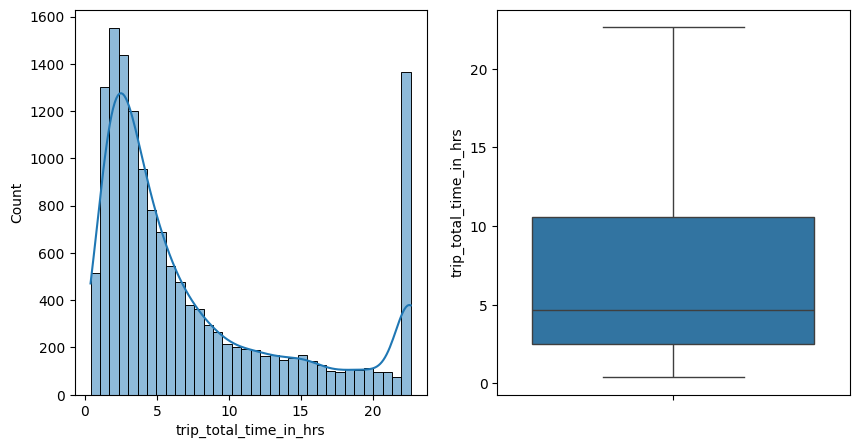

In [51]:
import warnings
warnings.filterwarnings("ignore")
fig, axs = plt.subplots(ncols= 2,  figsize=(10,5))
sns.histplot(ax=axs[0],data= trip_aggregated_df['trip_total_time_in_hrs'],kde=True)
sns.boxplot(ax=axs[1],data= trip_aggregated_df['trip_total_time_in_hrs'])
plt.show()

# **5. Hypothesis Testing**

a. actual_time aggregated value and OSRM time aggregated value.
</font>

we will use ttest paired sample test to know if there is significant difference in actual trip aggregated time and OSRM trip aggregated time for each trip

HO : mean Actual time to deliver package from source to destination is lesser than OSRM time for entire trip

HA: mean Actual time to deliver package from source to destination is greater than OSRM time

In [53]:
from scipy.stats import ttest_rel, ttest_ind

In [54]:
stat, pval=ttest_rel(trip_aggregated_df['trip_actual_time_sum'],
                     trip_aggregated_df['trip_osrm_time_sum'],
                    alternative='greater')
print(f"stat {stat} pval {pval}")

stat 112.89026761644506 pval 0.0


In [55]:
if pval <0.05:
    print("We will reject H0 :")
    print("mean Actual time to deliver package from source to destination is greater than OSRM time")
else:
    print("We fail to  reject H0 :")
    print("mean Actual time to deliver package from source to destination is lesser or equal  than OSRM time")

We will reject H0 :
mean Actual time to deliver package from source to destination is greater than OSRM time


In [56]:
np.mean(trip_aggregated_df['trip_actual_time_sum']), np.mean(trip_aggregated_df['trip_osrm_time_sum'])

(262.29289240549133, 114.49563806045852)

# **b. actual_time aggregated value and segment actual time aggregated value.**

we will use ttest paired sample test to know if there is significant difference in actual trip aggregated time and segment actual time aggregated value for each trip

HO : mean Actual aggregated trip time to deliver package from source to destination is lesser than segment actual time aggregated value  for entire trip

HA: mean Actual aggregated trip time to deliver package from source to destination is greater than segment actual time aggregated value  for entire trip

In [57]:
stat, pval=ttest_rel(trip_aggregated_df['trip_actual_time_sum'],
                     trip_aggregated_df['trip_segment_actual_time_sum'],
                    alternative='greater')
print(f"stat {stat} pval {pval}")

stat 122.11851987195247 pval 0.0


In [58]:
if pval <0.05:
    print("We will reject H0 :")
    print("mean Actual trip aggregated time   to deliver package from source to destination is greater than segment actual aggregated time")
else:
    print("We fail to  reject H0 :")
    print("mean Actual trip aggregated time to deliver package from source to destination is lesser or equal  than segment actual aggregated time")

We will reject H0 :
mean Actual trip aggregated time   to deliver package from source to destination is greater than segment actual aggregated time


# **c. OSRM distance aggregated value and segment OSRM distance aggregated value**

we will use ttest paired sample test to know if there is significant difference in OSRM distance aggregated value and segment actual aggregated distance for each trip

HO : mean Actual aggregated OSRM distance for trip to deliver package from source to destination is lesser than segment actual OSRM distance  aggregated value  for entire trip

HA: mean Actual aggregated OSRM distance  for trip to deliver package from source to destination is greater than segment actual OSRM distance  aggregated value  for entire trip

In [59]:
stat, pval=ttest_rel(trip_aggregated_df['trip_osrm_distance_sum'],
                     trip_aggregated_df['trip_segment_osrm_distance_sum'],
                    alternative='greater')
print(f"stat {stat} pval {pval}")

stat -50.07621180430228 pval 1.0


In [60]:
if pval <0.05:
    print("We will reject H0 :")
    print("mean Actual trip OSRM distance for trip  to deliver package from source to destination is greater than segment actual aggregated OSRM distance for trip")
else:
    print("We fail to  reject H0 :")
    print("mean Actual trip OSRM distance for trip to deliver package from source to destination is lesser or equal  than segment actual aggregated OSRM distance for trip")

We fail to  reject H0 :
mean Actual trip OSRM distance for trip to deliver package from source to destination is lesser or equal  than segment actual aggregated OSRM distance for trip


In [61]:
trip_aggregated_df

,trip_uuid,trip_actual_time_sum,trip_osrm_time_sum,trip_osrm_distance_sum,trip_segment_actual_time_sum,trip_segment_osrm_time_sum,trip_segment_osrm_distance_sum,trip_total_time_in_hrs
0,trip-153671041653548748,817.0,376.5,470.47515,811.0,415.0,492.533225,22.654942
1,trip-153671042288605164,143.0,68.0,85.11100,141.0,65.0,84.189400,3.026865
2,trip-153671043369099517,817.0,376.5,470.47515,811.0,415.0,492.533225,22.654942
3,trip-153671046011330457,59.0,15.0,19.68000,59.0,16.0,19.876600,1.674916
4,trip-153671052974046625,341.0,117.0,146.79180,340.0,115.0,146.791900,11.972484
...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,83.0,62.0,73.46300,82.0,62.0,64.855100,4.300482
14783,trip-153861104386292051,21.0,12.0,16.08820,21.0,11.0,16.088300,1.009842
14784,trip-153861106442901555,282.0,48.0,58.90370,281.0,88.0,104.886600,7.035331
14785,trip-153861115439069069,264.0,179.0,171.11030,258.0,221.0,223.532400,5.808548


In [62]:
np.max(trip_aggregated_df['trip_actual_time_sum']), np.max(trip_aggregated_df['trip_segment_actual_time_sum'])

(817.0, 811.0)

# **d. OSRM time aggregated value and segment OSRM time aggregated value.**

we will use ttest paired sample test to know if there is significant difference in OSRM time aggregated value and segment OSRM aggregated time for each trip

HO : mean Actual aggregated OSRM time aggreated  for trip to deliver package from source to destination is lesser than segment  OSRM  aggregated time   value  for entire trip

HA: mean Actual aggregated OSRM time aggregated   for trip to deliver package from source to destination is greater than segment  OSRM   aggregated time value  for entire trip

In [63]:
stat, pval=ttest_rel(trip_aggregated_df['trip_osrm_time_sum'],
                     trip_aggregated_df['trip_segment_osrm_time_sum'],
                    alternative='greater')
print(f"stat {stat} pval {pval}")

stat -63.41875343116358 pval 1.0


In [64]:
if pval <0.05:
    print("We will reject H0 :")
    print("mean Actual trip aggregated  OSRM time  for trip  to deliver package from source to destination is greater than segment actual aggregated OSRM time for trip")
else:
    print("We fail to  reject H0 :")
    print("mean Actual trip aggregated OSRM time  for trip to deliver package from source to destination is lesser or equal  than segment actual aggregated OSRM time for trip")

We fail to  reject H0 :
mean Actual trip aggregated OSRM time  for trip to deliver package from source to destination is lesser or equal  than segment actual aggregated OSRM time for trip


# **6. Business Insights & Recommendations**

From Where the Most Orders are coming from

In [65]:
# Check from where most orders are coming from (State, Corridor, etc.)


orders_from_df=df.groupby('source_state').agg(count_trips=('trip_uuid','nunique')).reset_index()
orders_from_df=orders_from_df.sort_values(by='count_trips', ascending=False)
orders_from_df

,source_state,count_trips
17,Maharashtra,2748
14,Karnataka,2324
10,Haryana,1824
25,Tamil Nadu,1109
28,Uttar Pradesh,873
26,Telangana,825
7,Delhi,790
9,Gujarat,774
30,West Bengal,682
23,Punjab,643


# **To Which State Most orders are going¶**

In [66]:
orders_to_df=df.groupby('destination_state').agg(count_trips=('trip_uuid','nunique')).reset_index()
orders_to_df=orders_to_df.sort_values(by='count_trips', ascending=False)
orders_to_df

,destination_state,count_trips
18,Maharashtra,2637
15,Karnataka,2425
11,Haryana,1800
26,Tamil Nadu,1097
29,Uttar Pradesh,882
27,Telangana,856
10,Gujarat,791
31,West Bengal,713
24,Punjab,693
8,Delhi,674


# **Most Busiest Corridor**



In [67]:
df['corridor']=df.apply(lambda x:"#".join([x['source_center'],x['destination_center']]), axis=1)
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,destination_code,source_code,trip_actual_time_sum,trip_osrm_time_sum,trip_osrm_distance_sum,trip_segment_actual_time_sum,trip_segment_osrm_time_sum,trip_segment_osrm_distance_sum,trip_total_time_in_hrs,corridor
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,HB,H_6,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,37.668497,IND209304AAA#IND000000ACB
1,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,HB,H_6,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,37.668497,IND209304AAA#IND000000ACB
2,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,HB,H_6,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,37.668497,IND209304AAA#IND000000ACB
3,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,HB,H_6,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,37.668497,IND209304AAA#IND000000ACB
4,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,HB,H_6,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,37.668497,IND209304AAA#IND000000ACB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144311,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,...,D,D,264.0,179.0,171.1103,258.0,221.0,223.5324,5.808548,IND628801AAA#IND628204AAA
144312,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,...,None,D,275.0,68.0,80.5787,274.0,67.0,80.5787,5.906793,IND583119AAA#IND583101AAA
144313,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,...,None,D,275.0,68.0,80.5787,274.0,67.0,80.5787,5.906793,IND583119AAA#IND583101AAA
144314,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583201AAA,Hospet (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),2018-10-04 02:51:44.712656,...,D,None,275.0,68.0,80.5787,274.0,67.0,80.5787,5.906793,IND583201AAA#IND583119AAA


In [68]:
corridor_total_trips=df.groupby(['trip_uuid','corridor']).nth(-1).groupby(['corridor']).agg(total_trips=('trip_uuid','nunique')).reset_index()
corridor_total_trips

,corridor,total_trips
0,IND000000AAL#IND411033AAA,18
1,IND000000AAQ#IND700028AAB,2
2,IND000000AAS#IND783370AAC,9
3,IND000000AAZ#IND444203AAA,1
4,IND000000AAZ#IND444303AAA,1
...,...,...
2736,IND854326AAB#IND854334AAA,1
2737,IND854334AAA#IND852118AAA,7
2738,IND854334AAA#IND854335AAA,2
2739,IND854335AAA#IND852111AAA,17


In [71]:
corridor_actual_time_mean_df=df.groupby(['trip_uuid','corridor']).nth(-1).groupby(['corridor']).agg(corridor_actual_time_mean=('segment_actual_time_cumsum','mean')).reset_index()
corridor_actual_time_mean_df

,corridor,corridor_actual_time_mean
0,IND000000AAL#IND411033AAA,87.388889
1,IND000000AAQ#IND700028AAB,84.500000
2,IND000000AAS#IND783370AAC,61.000000
3,IND000000AAZ#IND444203AAA,287.000000
4,IND000000AAZ#IND444303AAA,159.000000
...,...,...
2736,IND854326AAB#IND854334AAA,171.000000
2737,IND854334AAA#IND852118AAA,28.285714
2738,IND854334AAA#IND854335AAA,40.500000
2739,IND854335AAA#IND852111AAA,39.470588


# **Business Recommendations**


*  Maharashtra, Karnataka, Tamil Nadu, Utter Pradesh, Telangana and Gujarat States are states where most delivery trips are done. Most Bussiest corridor are in these states.
*   Business should focus on identifying best corridors to move packages very quickly, they should focus on potential reasons for difference in actual delivery time and osrm delivery time value.

*  If Actual delivery time is higher than osrm time then should focus on hops which are causing delays, if delays are related to processing or logistic that should be quickly fixed.
*   If Issue is not related to delivery and logistic process then should focus on identifying best route to move packages quickly.





# **Machine Learning Feature Transformations**


*   We can further transfer categorical vairbales using target encoding as we have high cardinality values for segment, coriddor, State can be encoded with one hot vectors
*  We can apply numerical transformation like MinMax or Standaradization on numerical features.



